
# Section 1: Data Loading and Preprocessing

## Bike Sharing Dataset Analysis

This script handles the data loading and preprocessing for the Bike Sharing Dataset from UCI ML Repository.

### Dataset Information:
- Source: UCI ML Repository (ID: 275)
- Task: Regression - predicting bike rental count
- Features: 16 features (numerical and categorical)
- Target: cnt (total rental bikes including both casual and registered)
- Samples: ~17,379 instances (2 years of data)

### Analysis Components:
- Data loading and exploration
- Feature analysis and visualization
- Data preprocessing and encoding
- Train/validation/test splits
- Feature scaling
- Target distribution analysis

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# UCI ML Repository
from ucimlrepo import fetch_ucirepo

# Set random seeds for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Section 1: Data Loading and Preprocessing")
print("Dataset: Bike Sharing Dataset")

📊 Section 1: Data Loading and Preprocessing
Dataset: Bike Sharing Dataset


In [9]:




def load_bike_sharing_data():
    """Load the Bike Sharing Dataset from UCI ML Repository"""
    print("\n" + "="*50)
    print("1.1 DATA LOADING")
    print("="*50)
    
    print("Loading Bike Sharing Dataset...")
    
    # Fetch dataset 
    bike_sharing_original = fetch_ucirepo(id=275) 
    
    # Data (as pandas dataframes) 
    X = bike_sharing_original.data.features 
    y = bike_sharing_original.data.targets 
    
    # Metadata 
    print("\nDataset Metadata:")
    print(bike_sharing_original.metadata) 
    
    # Variable information 
    print("\nVariable Information:")
    print(bike_sharing_original.variables) 
    
    bike_sharing = bike_sharing_original.data.original
    
    print(f"\nDataset shape: {bike_sharing.shape}")
    print(f"\nDataset info:")
    print(bike_sharing.info())
    
    # Display first few rows
    print(f"\nFirst 5 rows:")
    print(bike_sharing.head())
    
    return bike_sharing

def analyze_target_variable(bike_sharing):
    """Analyze target variable distribution"""
    print("\n" + "="*50)
    print("TARGET VARIABLE ANALYSIS")
    print("="*50)
    
    print(f"\nTarget variable (cnt) statistics:")
    print(bike_sharing['cnt'].describe())
    
    print(f"\nTarget variable range:")
    print(f"  Minimum: {bike_sharing['cnt'].min()}")
    print(f"  Maximum: {bike_sharing['cnt'].max()}")
    print(f"  Mean: {bike_sharing['cnt'].mean():.2f}")
    print(f"  Median: {bike_sharing['cnt'].median():.2f}")
    print(f"  Standard deviation: {bike_sharing['cnt'].std():.2f}")
    
    # Check for any extreme outliers
    Q1 = bike_sharing['cnt'].quantile(0.25)
    Q3 = bike_sharing['cnt'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = bike_sharing[(bike_sharing['cnt'] < lower_bound) | (bike_sharing['cnt'] > upper_bound)]
    print(f"\nOutliers (using IQR method): {len(outliers)} samples ({len(outliers)/len(bike_sharing)*100:.2f}%)")

def analyze_features(bike_sharing):
    """Analyze features in the dataset"""
    print("\n" + "="*50)
    print("1.2 FEATURE ANALYSIS")
    print("="*50)
    
    # Analyze features
    feature_columns = [col for col in bike_sharing.columns if col not in ['cnt', 'casual', 'registered']]
    print(f"Number of features: {len(feature_columns)}")
    print(f"\nFeature names:")
    for i, feature in enumerate(feature_columns, 1):
        print(f"  {i:2d}. {feature}")
    
    # Identify numerical and categorical features based on bike sharing dataset
    numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
    categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
    datetime_features = ['dteday']  # Will be processed separately
    
    print(f"\nNumerical features ({len(numerical_features)}):")
    for i, feature in enumerate(numerical_features, 1):
        print(f"  {i:2d}. {feature}")
    
    print(f"\nCategorical features ({len(categorical_features)}):")
    for i, feature in enumerate(categorical_features, 1):
        print(f"  {i:2d}. {feature}")
    
    print(f"\nDateTime features ({len(datetime_features)}):")
    for i, feature in enumerate(datetime_features, 1):
        print(f"  {i:2d}. {feature}")
    
    # Feature statistics for numerical features
    print(f"\nNumerical feature statistics:")
    print(bike_sharing[numerical_features].describe())
    
    # Analyze categorical features
    print(f"\nCategorical feature analysis:")
    for feature in categorical_features:
        print(f"\n{feature}:")
        value_counts = bike_sharing[feature].value_counts().sort_index()
        print(value_counts)
        print(f"  Unique values: {len(value_counts)}")
    
    # Check for missing values
    print("\nMissing values per column:")
    missing_values = bike_sharing.isnull().sum()
    if missing_values.sum() == 0:
        print("✅ No missing values found")
    else:
        print(missing_values[missing_values > 0])
    
    # Check data types
    print(f"\nData types:")
    print(bike_sharing.dtypes)
    
    return feature_columns, numerical_features, categorical_features, datetime_features

def create_visualizations(bike_sharing, feature_columns, numerical_features, categorical_features):
    """Create data visualizations"""
    print("\n" + "="*50)
    print("1.3 DATA VISUALIZATION")
    print("="*50)
    
    # Create output directory
    os.makedirs('./Section1_data_preprocessing', exist_ok=True)
    
    # Visualize target and key feature distributions
    plt.figure(figsize=(15, 10))
    
    # Target distribution
    plt.subplot(2, 3, 1)
    plt.hist(bike_sharing['cnt'], bins=50, alpha=0.7, color='lightblue')
    plt.title('Distribution of Bike Rental Count (Target)')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    
    # Target distribution (log scale)
    plt.subplot(2, 3, 2)
    plt.hist(np.log1p(bike_sharing['cnt']), bins=50, alpha=0.7, color='lightgreen')
    plt.title('Log Distribution of Bike Rental Count')
    plt.xlabel('Log(Count + 1)')
    plt.ylabel('Frequency')
    
    # Temperature vs Count
    plt.subplot(2, 3, 3)
    plt.scatter(bike_sharing['temp'], bike_sharing['cnt'], alpha=0.5, color='orange')
    plt.title('Temperature vs Bike Count')
    plt.xlabel('Normalized Temperature')
    plt.ylabel('Count')
    
    # Humidity vs Count
    plt.subplot(2, 3, 4)
    plt.scatter(bike_sharing['hum'], bike_sharing['cnt'], alpha=0.5, color='purple')
    plt.title('Humidity vs Bike Count')
    plt.xlabel('Normalized Humidity')
    plt.ylabel('Count')
    
    # Hour distribution
    plt.subplot(2, 3, 5)
    hourly_avg = bike_sharing.groupby('hr')['cnt'].mean()
    hourly_avg.plot(kind='bar', color='red', alpha=0.7)
    plt.title('Average Bike Count by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average Count')
    plt.xticks(rotation=45)
    
    # Season distribution
    plt.subplot(2, 3, 6)
    season_avg = bike_sharing.groupby('season')['cnt'].mean()
    season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
    season_avg.plot(kind='bar', color='teal', alpha=0.7)
    plt.title('Average Bike Count by Season')
    plt.xlabel('Season')
    plt.ylabel('Average Count')
    plt.xticks(range(4), season_labels, rotation=45)
    
    plt.tight_layout()
    plt.savefig('./Section1_data_preprocessing/target_and_feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Feature correlation analysis
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Correlation heatmap for numerical features + target
    corr_features = numerical_features + ['cnt']
    corr_matrix = bike_sharing[corr_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=axes[0])
    axes[0].set_title('Correlation Matrix: Numerical Features')
    
    # Correlation with target
    # Filter out non-numeric columns for correlation calculation
    numeric_feature_columns = [col for col in feature_columns if col != 'dteday']
    target_corr = bike_sharing[numeric_feature_columns + ['cnt']].corr()['cnt'].drop('cnt').sort_values(key=abs, ascending=False)

    # target_corr = bike_sharing[feature_columns + ['cnt']].corr()['cnt'].drop('cnt').sort_values(key=abs, ascending=False)
    target_corr.plot(kind='barh', ax=axes[1], color='skyblue')
    axes[1].set_title('Feature Correlation with Target (cnt)')
    axes[1].set_xlabel('Correlation Coefficient')
    
    plt.tight_layout()
    plt.savefig('./Section1_data_preprocessing/feature_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Categorical features analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    # Weather situation vs Count
    weather_avg = bike_sharing.groupby('weathersit')['cnt'].mean()
    weather_labels = ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow']
    weather_avg.plot(kind='bar', ax=axes[0], color='lightcoral')
    axes[0].set_title('Average Bike Count by Weather Situation')
    axes[0].set_xlabel('Weather Situation')
    axes[0].set_ylabel('Average Count')
    axes[0].set_xticklabels(weather_labels[:len(weather_avg)], rotation=45)
    
    # Working day vs Count
    workday_avg = bike_sharing.groupby('workingday')['cnt'].mean()
    workday_avg.plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_title('Average Bike Count by Working Day')
    axes[1].set_xlabel('Working Day (0=No, 1=Yes)')
    axes[1].set_ylabel('Average Count')
    axes[1].tick_params(axis='x', rotation=0)
    
    # Month vs Count
    month_avg = bike_sharing.groupby('mnth')['cnt'].mean()
    month_avg.plot(kind='bar', ax=axes[2], color='orange')
    axes[2].set_title('Average Bike Count by Month')
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('Average Count')
    axes[2].tick_params(axis='x', rotation=45)
    
    # Weekday vs Count
    weekday_avg = bike_sharing.groupby('weekday')['cnt'].mean()
    weekday_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    weekday_avg.plot(kind='bar', ax=axes[3], color='purple')
    axes[3].set_title('Average Bike Count by Weekday')
    axes[3].set_xlabel('Weekday')
    axes[3].set_ylabel('Average Count')
    axes[3].set_xticklabels(weekday_labels, rotation=45)
    
    plt.tight_layout()
    plt.savefig('./Section1_data_preprocessing/categorical_features_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def preprocess_data(bike_sharing, categorical_features):
    """Preprocess the data"""
    print("\n" + "="*50)
    print("1.4 DATA PREPROCESSING")
    print("="*50)
    
    # Preprocessing
    df = bike_sharing.copy()
    
    # Remove datetime column and other non-feature columns
    df = df.drop(columns=['dteday', 'casual', 'registered'])
    
    # All categorical features are already encoded as integers in this dataset
    # No additional encoding needed for season, yr, mnth, hr, holiday, weekday, workingday, weathersit
    
    print("✅ Categorical features are already encoded as integers")
    print(f"\nDataset shape after preprocessing: {df.shape}")
    print(f"Features: {df.columns.tolist()}")
    
    # Define feature names (excluding target)
    feature_names = [col for col in df.columns if col != 'cnt']
    
    print(f"\nFeature names ({len(feature_names)} features):")
    for i, name in enumerate(feature_names, 1):
        print(f"  {i:2d}. {name}")
    
    # Verify feature categories
    numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
    print(f"\nFeature categorization:")
    print(f"  Numerical: {numerical_features}")
    print(f"  Categorical: {[f for f in categorical_features if f in feature_names]}")
    
    return df, feature_names, numerical_features

def separate_features_target(df, feature_names):
    """Separate features and target variable"""
    # Separate features and target
    X = df.drop(columns=['cnt']).values
    y = df['cnt'].values
    
    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target type: Continuous (regression)")
    print(f"Target range: [{y.min()}, {y.max()}]")
    
    # Verify feature statistics
    print(f"\nFeature value ranges (first 5 features):")
    for i, feature_name in enumerate(feature_names[:5]):
        print(f"  {feature_name}: [{X[:, i].min():.2f}, {X[:, i].max():.2f}]")
    print("  ...")
    
    return X, y

def split_data(X, y):
    """Split data into train/validation/test sets"""
    print("\n" + "="*50)
    print("1.5 DATA SPLITTING")
    print("="*50)
    
    # Split the data (no stratification needed for regression)
    # First split: 80% train+val, 20% test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Second split: 80% train, 20% val (of the temp set)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.2, random_state=42
    )
    
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")
    
    # Check target distribution in splits
    print(f"\nTarget distribution in splits:")
    print(f"Training:   Mean={y_train.mean():.2f}, Std={y_train.std():.2f}, Range=[{y_train.min()}, {y_train.max()}]")
    print(f"Validation: Mean={y_val.mean():.2f}, Std={y_val.std():.2f}, Range=[{y_val.min()}, {y_val.max()}]")
    print(f"Test:       Mean={y_test.mean():.2f}, Std={y_test.std():.2f}, Range=[{y_test.min()}, {y_test.max()}]")
    
    # Verify proportions are maintained
    total_samples = len(X)
    print(f"\nData split proportions:")
    print(f"  Training:   {len(y_train)} samples ({len(y_train)/total_samples*100:.1f}%)")
    print(f"  Validation: {len(y_val)} samples ({len(y_val)/total_samples*100:.1f}%)")
    print(f"  Test:       {len(y_test)} samples ({len(y_test)/total_samples*100:.1f}%)")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def scale_features(X_train, X_val, X_test, y_train, y_val, y_test, feature_names):
    """Scale features using StandardScaler"""
    print("\n" + "="*50)
    print("1.6 FEATURE SCALING")
    print("="*50)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Scaled training set: {X_train_scaled.shape}")
    print(f"Scaled validation set: {X_val_scaled.shape}")
    print(f"Scaled test set: {X_test_scaled.shape}")
    
    # Verify scaling worked correctly
    print(f"\nScaling verification (training set):")
    print(f"  Mean (should be ~0): {X_train_scaled.mean(axis=0)[:3]}...")
    print(f"  Std (should be ~1):  {X_train_scaled.std(axis=0)[:3]}...")
    
    # Show scaling effect on sample features
    sample_features_idx = [0, 1, 2]  # season, yr, mnth
    print(f"\nScaling effect on sample features:")
    for idx in sample_features_idx:
        feature_name = feature_names[idx]
        print(f"  {feature_name}:")
        print(f"    Original range: [{X_train[:, idx].min():.2f}, {X_train[:, idx].max():.2f}]")
        print(f"    Scaled range:   [{X_train_scaled[:, idx].min():.2f}, {X_train_scaled[:, idx].max():.2f}]")
    
    # Visualize scaling effect
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    # Select features to visualize scaling effect
    features_to_plot = ['temp', 'atemp', 'hum', 'windspeed', 'hr', 'season']
    feature_indices = [feature_names.index(f) for f in features_to_plot]
    
    for i, (feature_name, feature_idx) in enumerate(zip(features_to_plot, feature_indices)):
        # Original data
        axes[i].hist(X_train[:, feature_idx], bins=30, alpha=0.7, label='Original', color='lightcoral')
        # Scaled data
        axes[i].hist(X_train_scaled[:, feature_idx], bins=30, alpha=0.7, label='Scaled', color='lightblue')
        
        axes[i].set_title(f'Scaling Effect: {feature_name}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./Section1_data_preprocessing/feature_scaling_effect.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return X_train_scaled, X_val_scaled, X_test_scaled, scaler

def create_summary_and_export(bike_sharing, X_train, X_val, X_test, y_train, y_val, y_test, 
                             X_train_scaled, X_val_scaled, X_test_scaled, feature_names, 
                             numerical_features, categorical_features, scaler, y):
    """Create data summary and export preprocessed data"""
    print("\n" + "="*50)
    print("1.7 DATA SUMMARY AND EXPORT")
    print("="*50)
    
    # Create comprehensive data summary
    data_summary = {
        'dataset_info': {
            'name': 'Bike Sharing Dataset',
            'source': 'UCI ML Repository (ID: 275)',
            'total_samples': len(bike_sharing),
            'num_features': len(feature_names),
            'task_type': 'Regression',
            'target_variable': 'cnt',
            'target_range': [int(y.min()), int(y.max())],
            'target_mean': float(y.mean()),
            'target_std': float(y.std())
        },
        'data_splits': {
            'train_size': len(X_train),
            'val_size': len(X_val),
            'test_size': len(X_test),
            'train_ratio': len(X_train) / len(bike_sharing),
            'val_ratio': len(X_val) / len(bike_sharing),
            'test_ratio': len(X_test) / len(bike_sharing)
        },
        'target_distribution': {
            'train_mean': float(y_train.mean()),
            'val_mean': float(y_val.mean()),
            'test_mean': float(y_test.mean()),
            'train_std': float(y_train.std()),
            'val_std': float(y_val.std()),
            'test_std': float(y_test.std())
        },
        'feature_info': {
            'feature_names': feature_names,
            'numerical_features': numerical_features,
            'categorical_features': [f for f in categorical_features if f in feature_names]
        }
    }
    
    print("📊 DATA PREPROCESSING SUMMARY")
    print("=" * 50)
    print(f"Dataset: {data_summary['dataset_info']['name']}")
    print(f"Total Samples: {data_summary['dataset_info']['total_samples']:,}")
    print(f"Features: {data_summary['dataset_info']['num_features']}")
    print(f"Task Type: {data_summary['dataset_info']['task_type']}")
    print(f"Target Variable: {data_summary['dataset_info']['target_variable']}")
    print(f"Target Range: {data_summary['dataset_info']['target_range']}")
    print(f"Target Mean: {data_summary['dataset_info']['target_mean']:.2f}")
    print(f"Target Std: {data_summary['dataset_info']['target_std']:.2f}")
    print(f"\nData Splits:")
    print(f"  Training:   {data_summary['data_splits']['train_size']:,} ({data_summary['data_splits']['train_ratio']:.1%})")
    print(f"  Validation: {data_summary['data_splits']['val_size']:,} ({data_summary['data_splits']['val_ratio']:.1%})")
    print(f"  Test:       {data_summary['data_splits']['test_size']:,} ({data_summary['data_splits']['test_ratio']:.1%})")
    print(f"\nTarget Distribution:")
    print(f"  Train Mean: {data_summary['target_distribution']['train_mean']:.2f}")
    print(f"  Val Mean: {data_summary['target_distribution']['val_mean']:.2f}")
    print(f"  Test Mean: {data_summary['target_distribution']['test_mean']:.2f}")
    
    print(f"\n✅ Data preprocessing completed successfully!")
    print(f"📁 Ready for model training in Section 2")
    
    # Save preprocessed data for use in other scripts
    preprocessing_data = {
        'X_train_scaled': X_train_scaled,
        'X_val_scaled': X_val_scaled,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'feature_names': feature_names,
        'scaler': scaler,
        'data_summary': data_summary
    }
    
    # Save to pickle file
    with open('./bike_sharing_preprocessed_data.pkl', 'wb') as f:
        pickle.dump(preprocessing_data, f)
    
    print("💾 Preprocessed data saved to './bike_sharing_preprocessed_data.pkl'")
    print("📋 This file contains all necessary data for Sections 2 and 3")
    
    # Also save a CSV version for easy inspection
    df_export = pd.DataFrame(X_train_scaled, columns=feature_names)
    df_export['cnt'] = y_train
    df_export.to_csv('./bike_sharing_train_scaled.csv', index=False)
    print("📄 Training data also saved as './bike_sharing_train_scaled.csv'")
    
    return data_summary, preprocessing_data


In [10]:

def main():
    """Main function to run the complete preprocessing pipeline"""
    print("🚴 Starting Bike Sharing Dataset Preprocessing Pipeline")
    print("="*60)
    
    # Step 1: Load data
    bike_sharing = load_bike_sharing_data()
    
    # Step 2: Analyze target variable
    analyze_target_variable(bike_sharing)
    
    # Step 3: Analyze features
    feature_columns, numerical_features, categorical_features, datetime_features = analyze_features(bike_sharing)
    
    # Step 4: Create visualizations
    create_visualizations(bike_sharing, feature_columns, numerical_features, categorical_features)
    
    # Step 5: Preprocess data
    df, feature_names, numerical_features = preprocess_data(bike_sharing, categorical_features)
    
    # Step 6: Separate features and target
    X, y = separate_features_target(df, feature_names)
    
    # Step 7: Split data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    
    # Step 8: Scale features
    X_train_scaled, X_val_scaled, X_test_scaled, scaler = scale_features(
        X_train, X_val, X_test, y_train, y_val, y_test, feature_names
    )
    
    # Step 9: Create summary and export
    data_summary, preprocessing_data = create_summary_and_export(
        bike_sharing, X_train, X_val, X_test, y_train, y_val, y_test,
        X_train_scaled, X_val_scaled, X_test_scaled, feature_names,
        numerical_features, categorical_features, scaler, y
    )
    
    print("\n🎉 Preprocessing pipeline completed successfully!")
    print("📊 Data is ready for XGBoost, FT-Transformer, SAINT, and TabTransformer model training")
    
    return preprocessing_data


🚴 Starting Bike Sharing Dataset Preprocessing Pipeline

1.1 DATA LOADING
Loading Bike Sharing Dataset...

Dataset Metadata:
{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Even

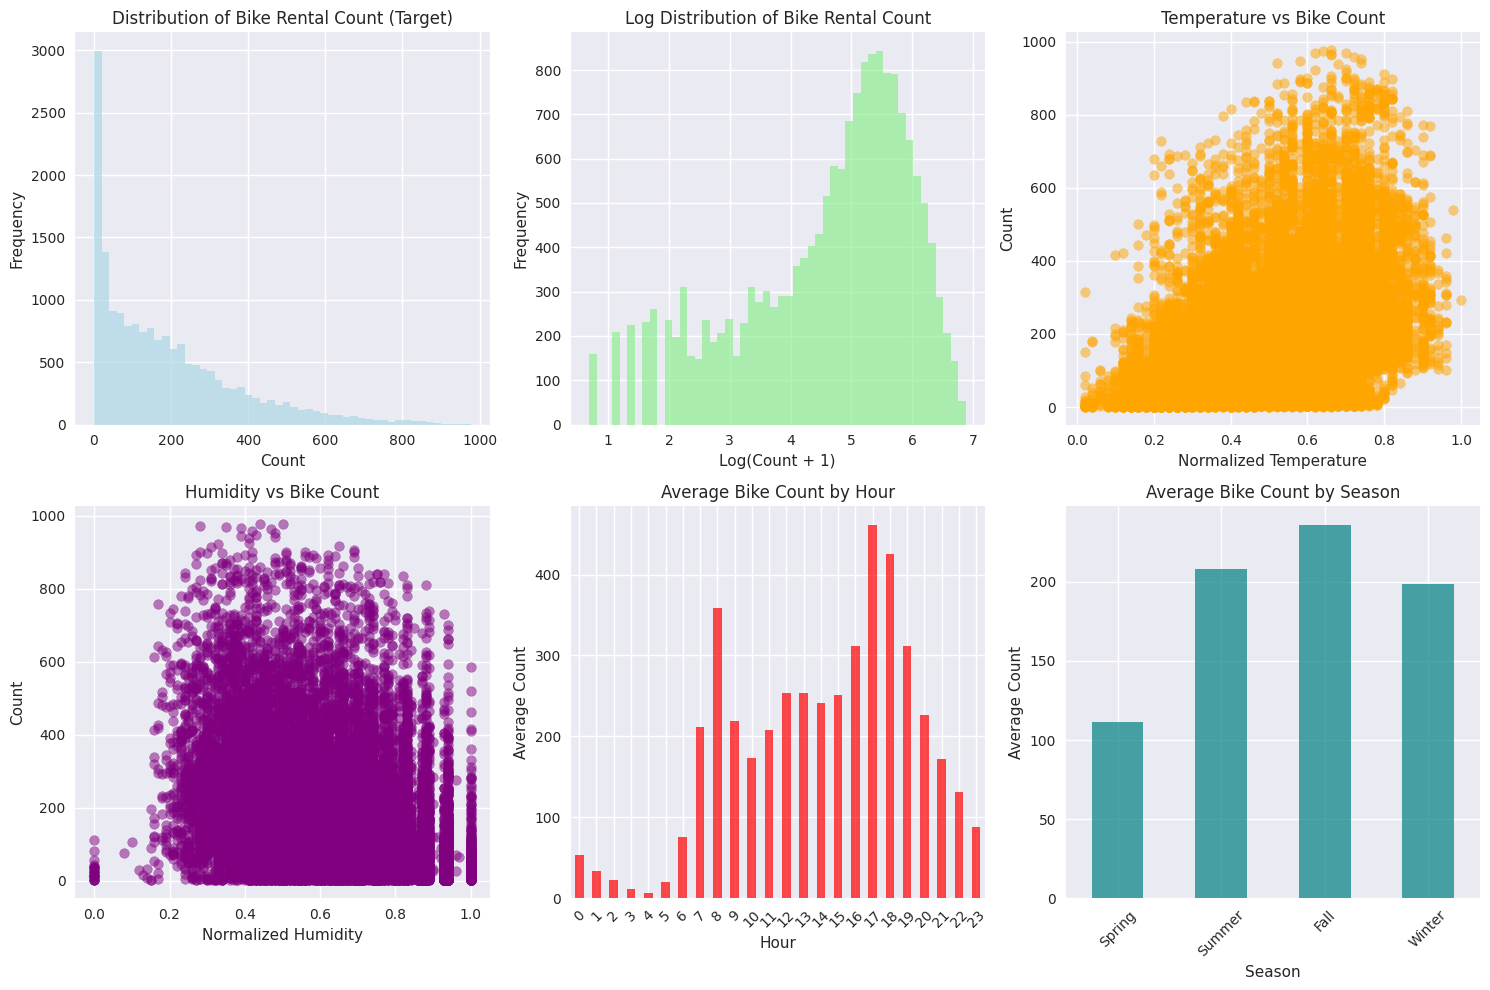

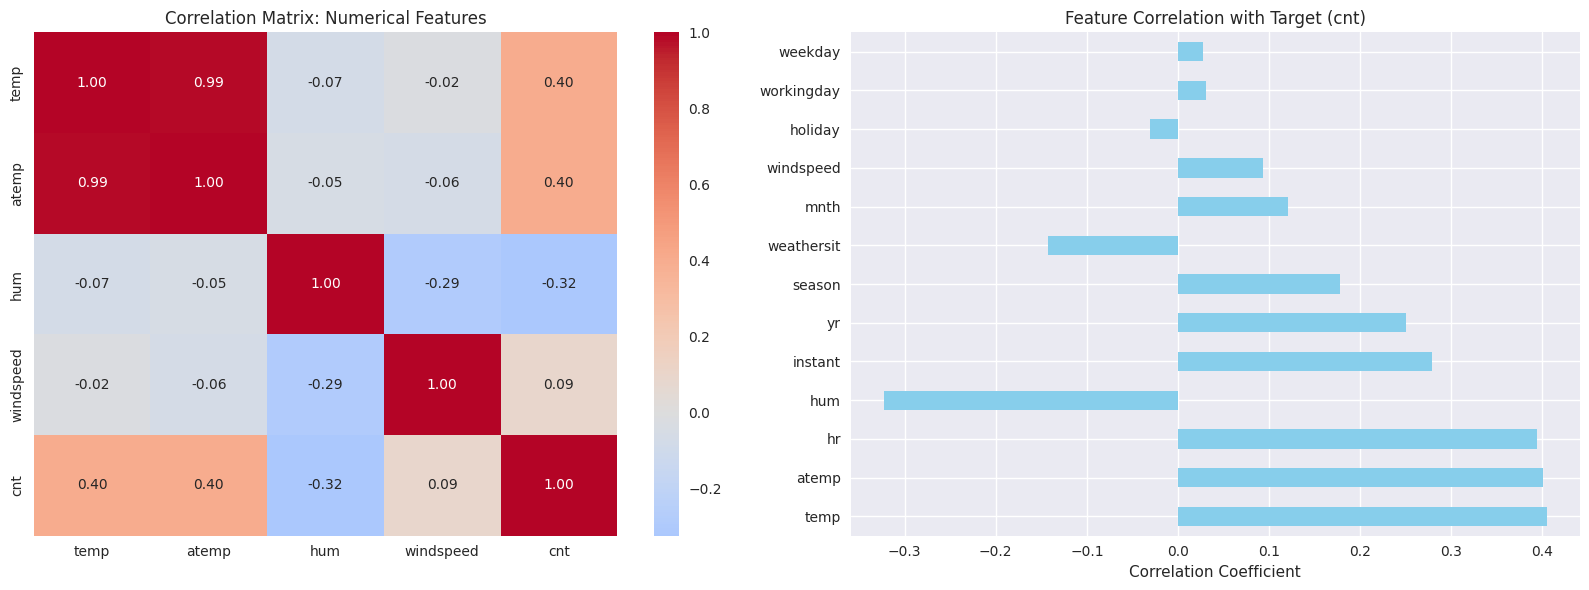

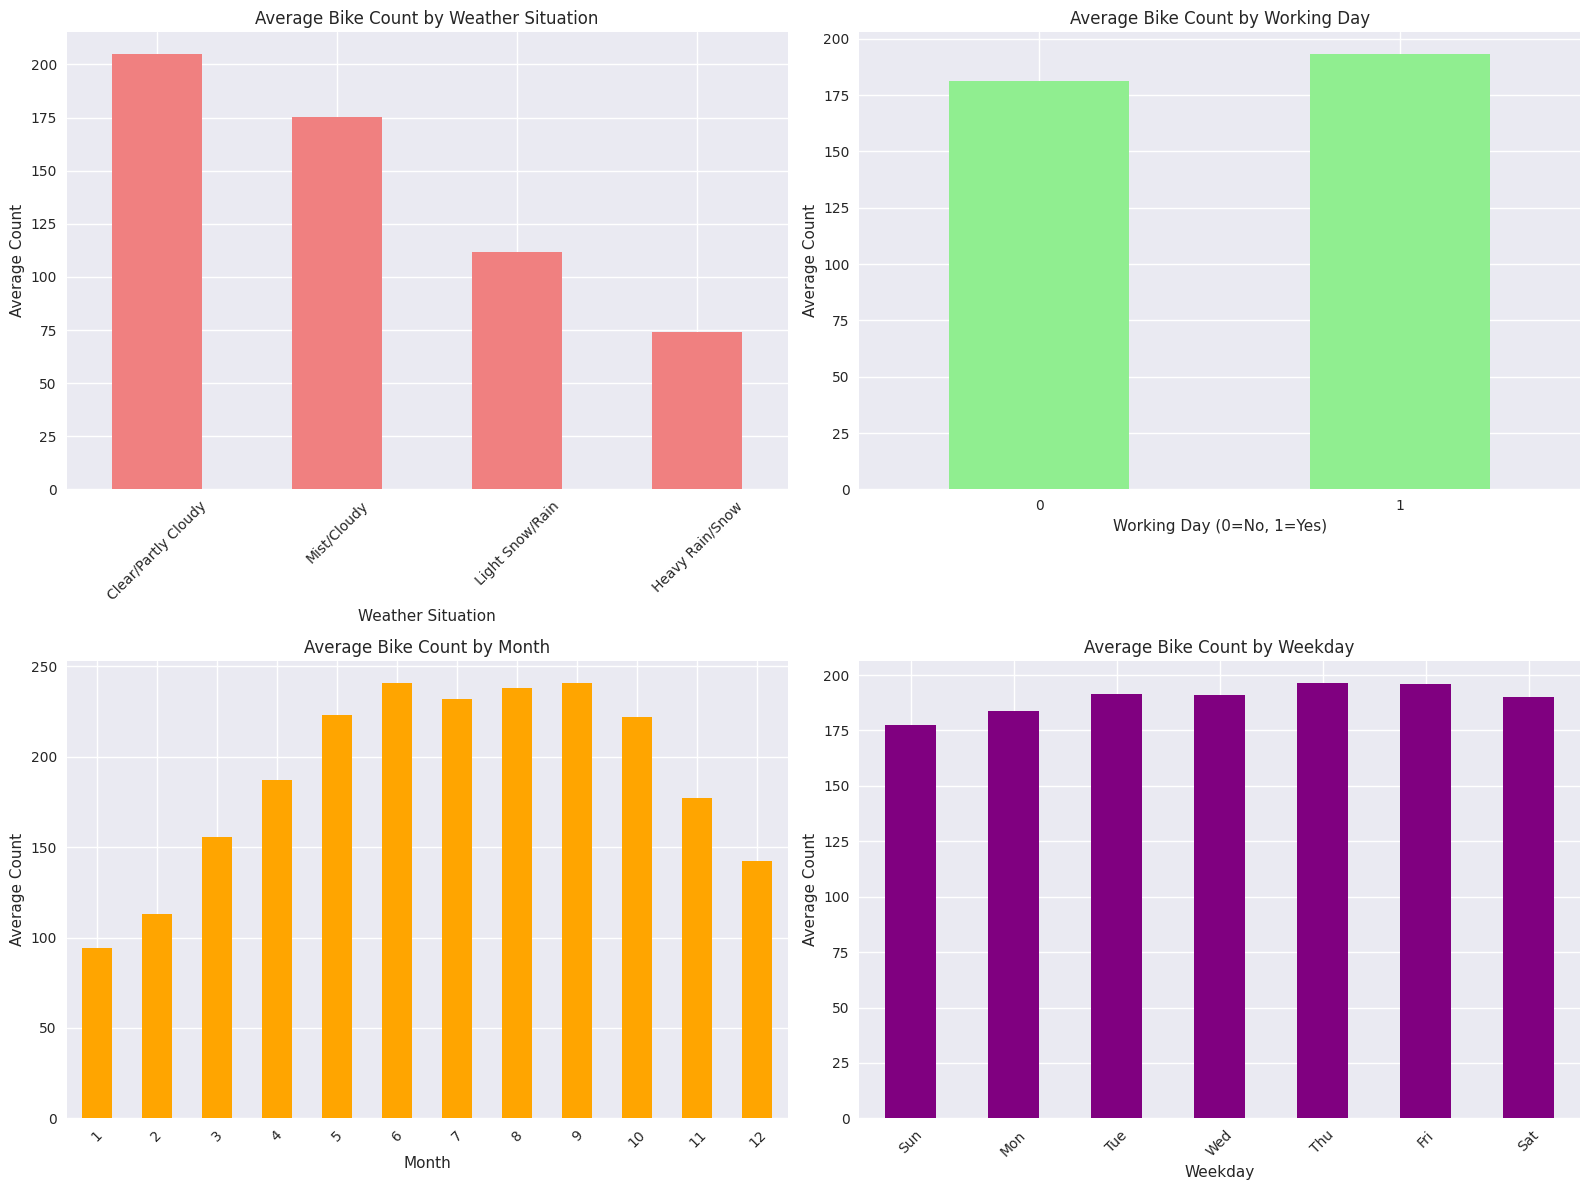


1.4 DATA PREPROCESSING
✅ Categorical features are already encoded as integers

Dataset shape after preprocessing: (17379, 14)
Features: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

Feature names (13 features):
   1. instant
   2. season
   3. yr
   4. mnth
   5. hr
   6. holiday
   7. weekday
   8. workingday
   9. weathersit
  10. temp
  11. atemp
  12. hum
  13. windspeed

Feature categorization:
  Numerical: ['temp', 'atemp', 'hum', 'windspeed']
  Categorical: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

Features shape: (17379, 13)
Target shape: (17379,)
Target type: Continuous (regression)
Target range: [1, 977]

Feature value ranges (first 5 features):
  instant: [1.00, 17379.00]
  season: [1.00, 4.00]
  yr: [0.00, 1.00]
  mnth: [1.00, 12.00]
  hr: [0.00, 23.00]
  ...

1.5 DATA SPLITTING
Training set: (11122, 13)
Validation set: (2781, 13)
Test set: (34

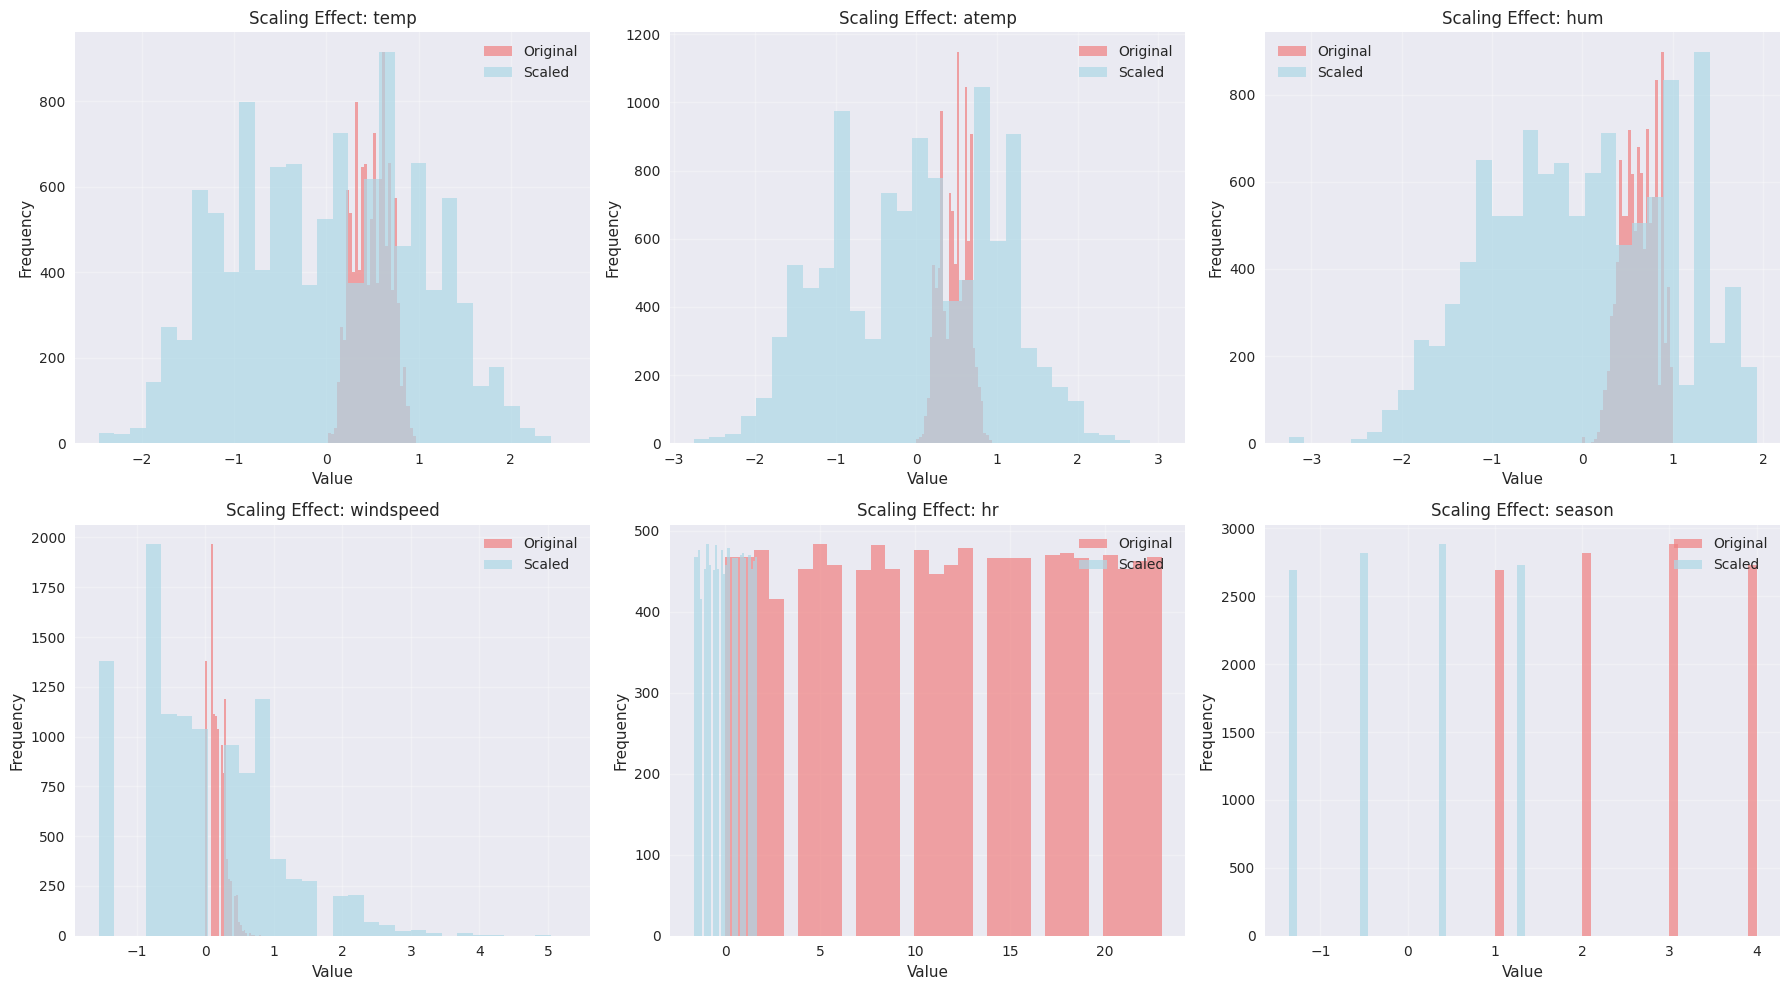


1.7 DATA SUMMARY AND EXPORT
📊 DATA PREPROCESSING SUMMARY
Dataset: Bike Sharing Dataset
Total Samples: 17,379
Features: 13
Task Type: Regression
Target Variable: cnt
Target Range: [1, 977]
Target Mean: 189.46
Target Std: 181.38

Data Splits:
  Training:   11,122 (64.0%)
  Validation: 2,781 (16.0%)
  Test:       3,476 (20.0%)

Target Distribution:
  Train Mean: 190.26
  Val Mean: 191.83
  Test Mean: 185.01

✅ Data preprocessing completed successfully!
📁 Ready for model training in Section 2
💾 Preprocessed data saved to './bike_sharing_preprocessed_data.pkl'
📋 This file contains all necessary data for Sections 2 and 3
📄 Training data also saved as './bike_sharing_train_scaled.csv'

🎉 Preprocessing pipeline completed successfully!
📊 Data is ready for XGBoost, FT-Transformer, SAINT, and TabTransformer model training


In [11]:
preprocessing_data = main()